In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [79]:
df = pd.read_csv('California_housing')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [81]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [82]:
df.shape

(20640, 10)

In [83]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [86]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [87]:
df.dropna(inplace= True)

In [89]:
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [90]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=42)

In [91]:
print("X Train shape:" ,X_train.shape)
print("X Test shape:" ,X_test.shape)

X Train shape: (16512, 9)
X Test shape: (4128, 9)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

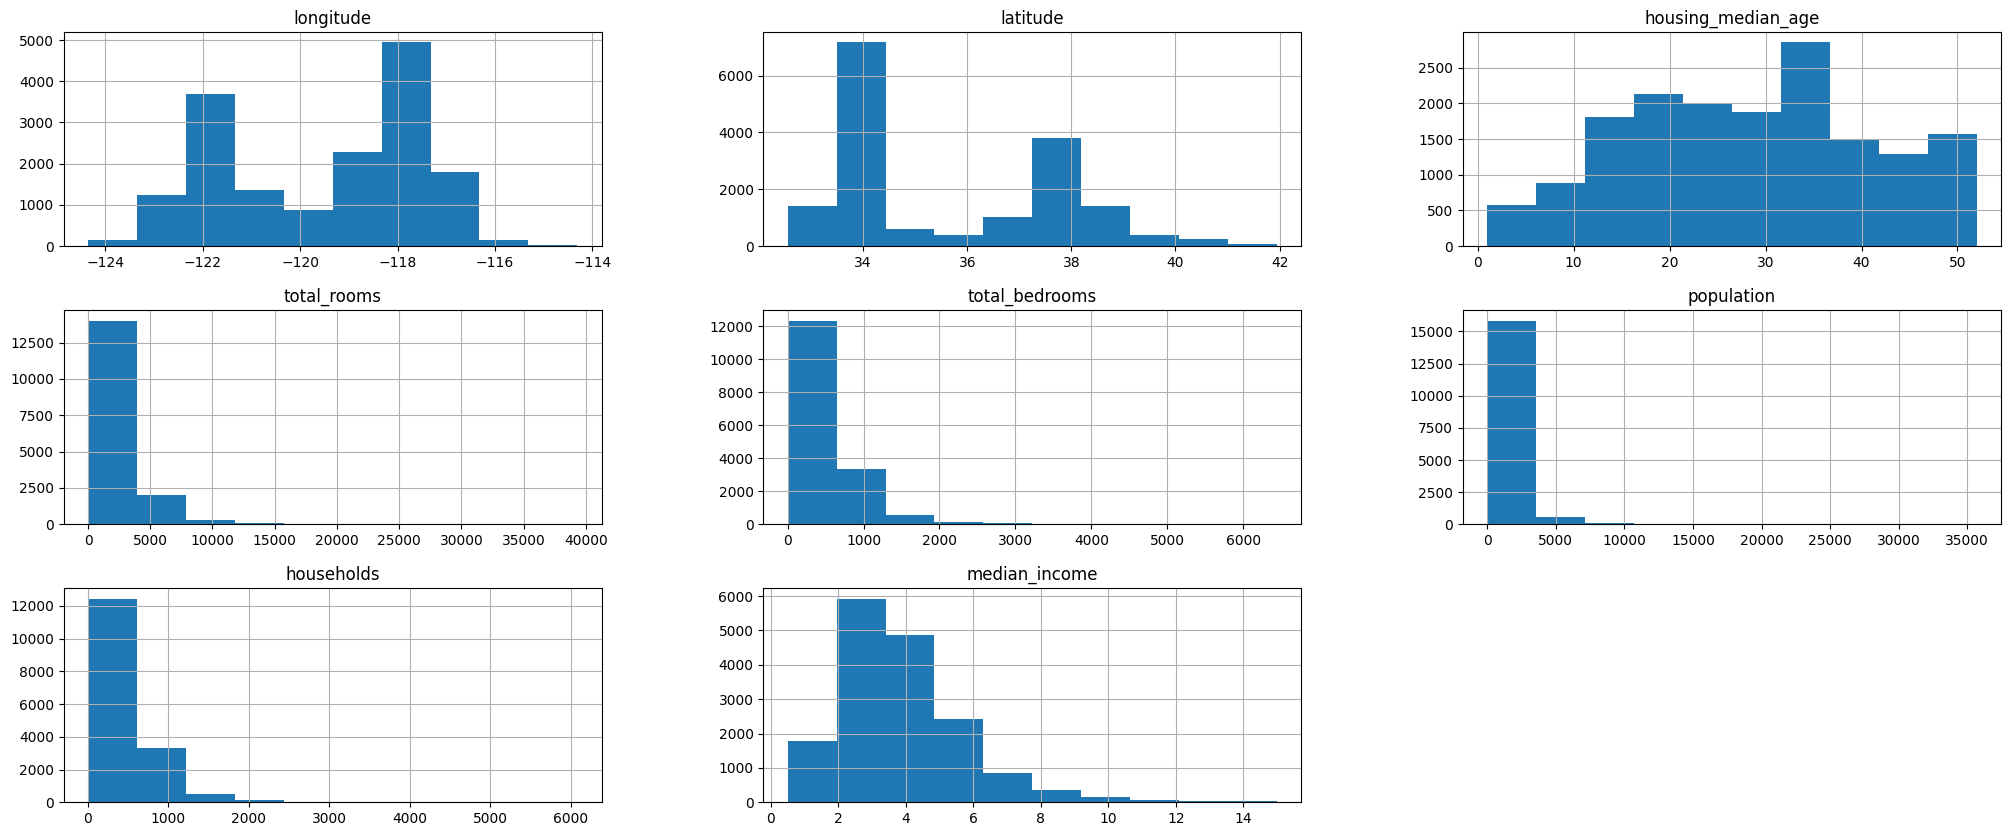

In [92]:
X_train.hist(figsize=(25 ,10))

<Axes: >

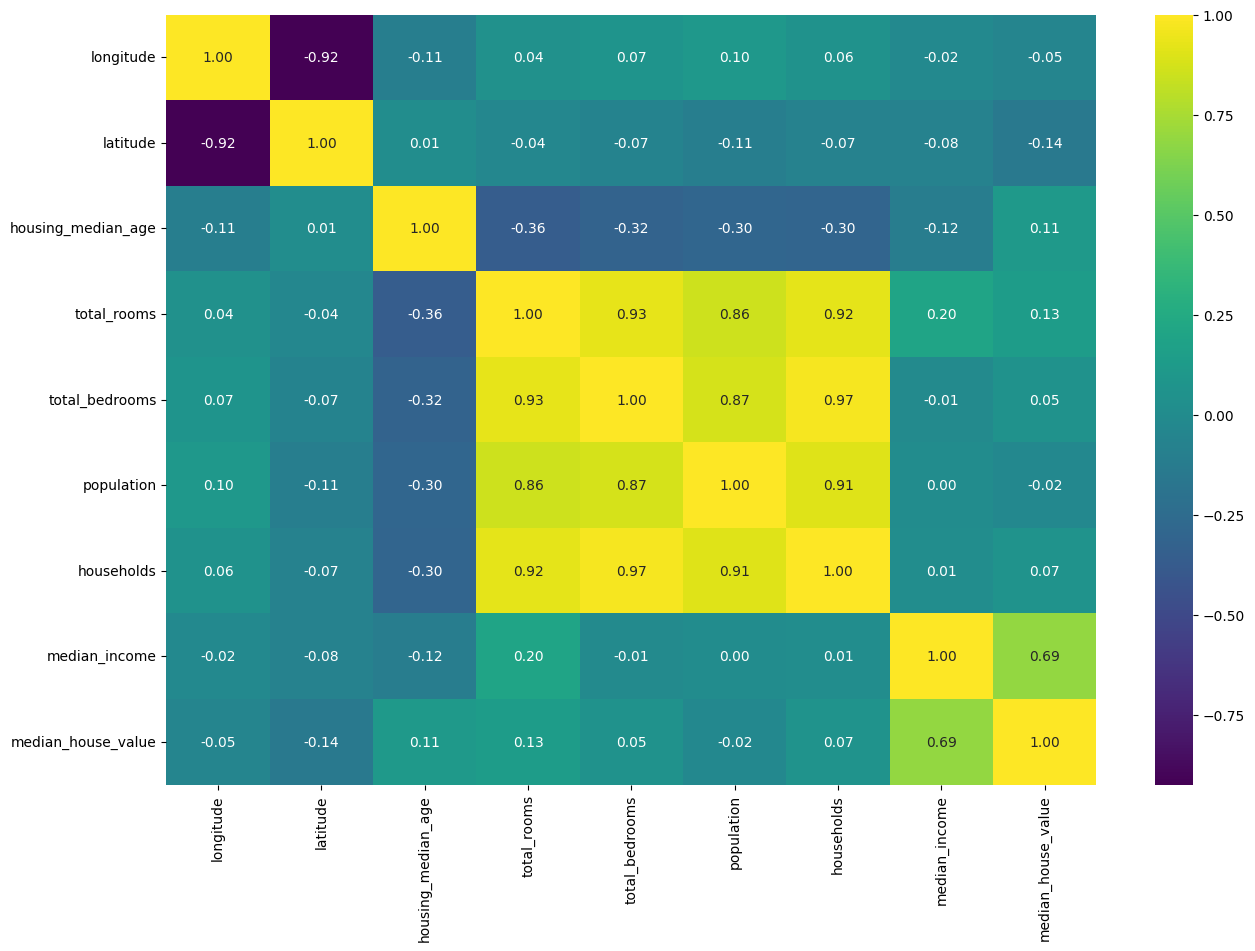

In [62]:
plt.figure(figsize = (15 ,10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix , annot = True , fmt = '.2f', cmap = 'viridis')

<Axes: xlabel='latitude', ylabel='longitude'>

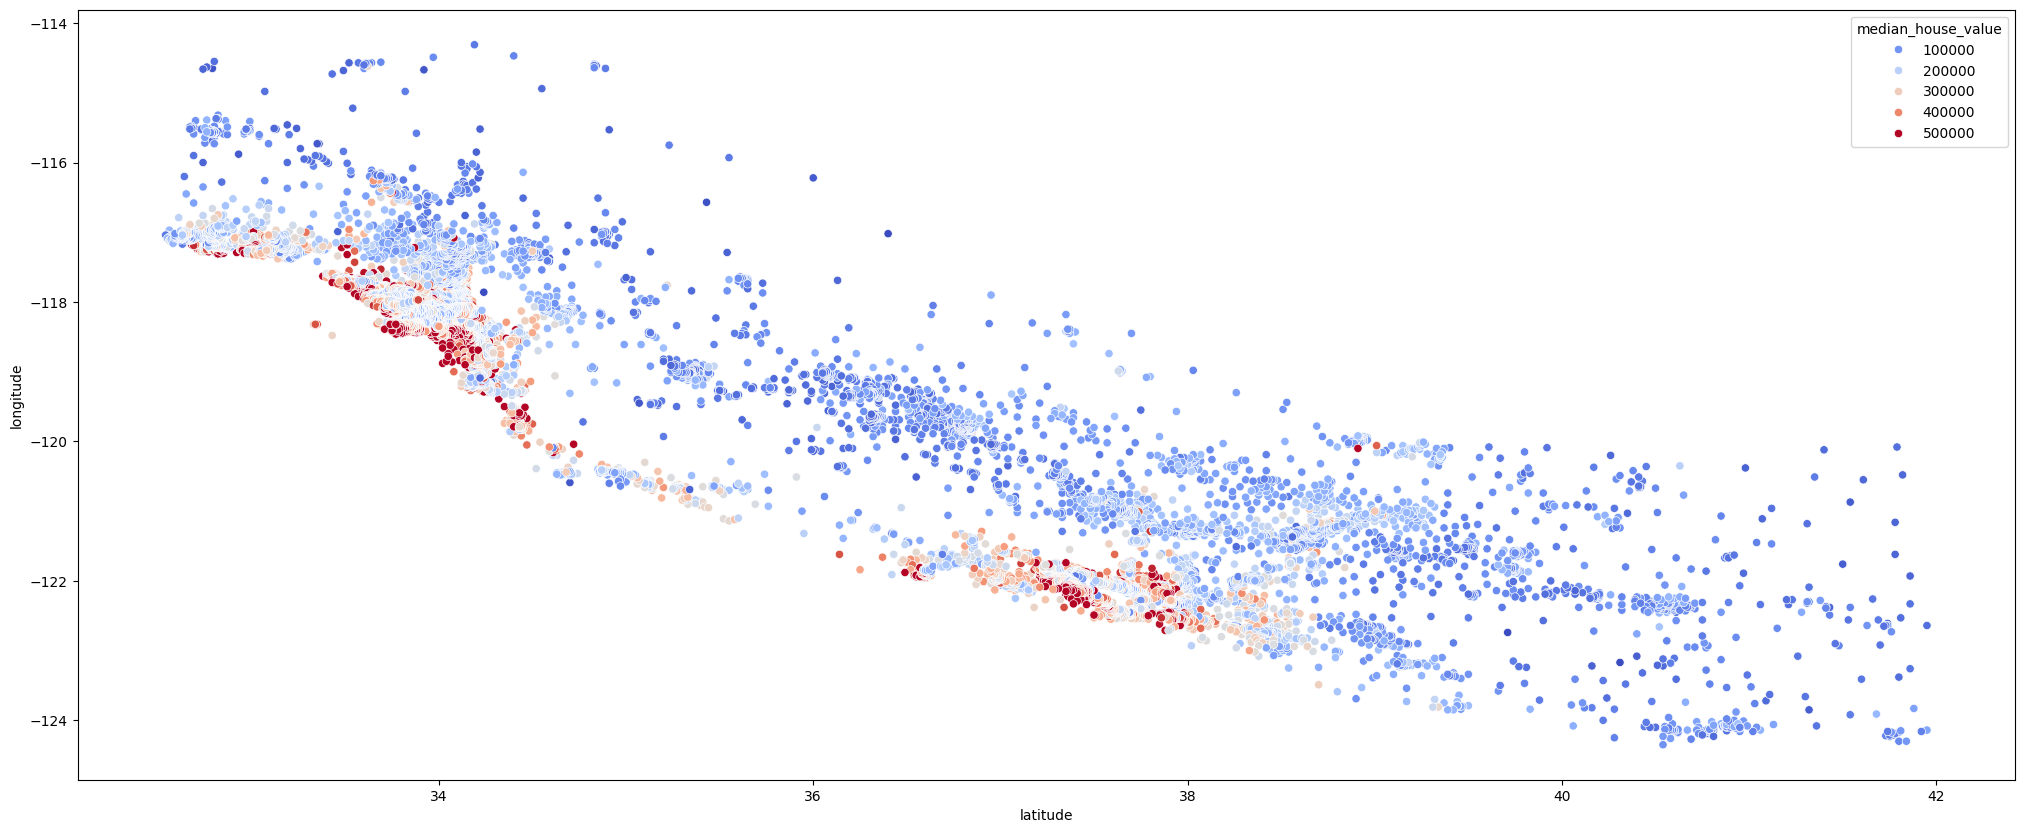

In [93]:
plt.figure(figsize = (25 ,10))
sns.scatterplot(x = 'latitude' , y = 'longitude', data = df ,hue = 'median_house_value', palette = 'coolwarm')

In [97]:
for df in [X_train, X_test]:
    if 'ocean_proximity' in df.columns:
        df.drop(columns=['ocean_proximity'], inplace=True)


In [98]:
X_train_numeric = X_train.select_dtypes(include=['number'])
reg = LinearRegression()
reg.fit(X_train_numeric, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
y_pred_reg = reg.predict(X_test)
result = pd.DataFrame({'Actual':y_test ,'Predicted':y_pred_reg})
result.head()

,Actual,Predicted
20046,47700,63736.591338
3024,45800,154344.594319
15663,500001,253073.194287
20484,218600,263507.746536
9814,278000,266883.359611


In [100]:
mae = mean_absolute_error(y_test , y_pred_reg)
msq = mean_squared_error(y_test ,y_pred_reg)
r2= r2_score(y_test ,y_pred_reg)

print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error {msq:.2f}")
print(f"r2 Score : {r2:.4f}")

Mean Absolute Error : 51810.48
Mean Squared Error 5059928371.17
r2 Score : 0.6139


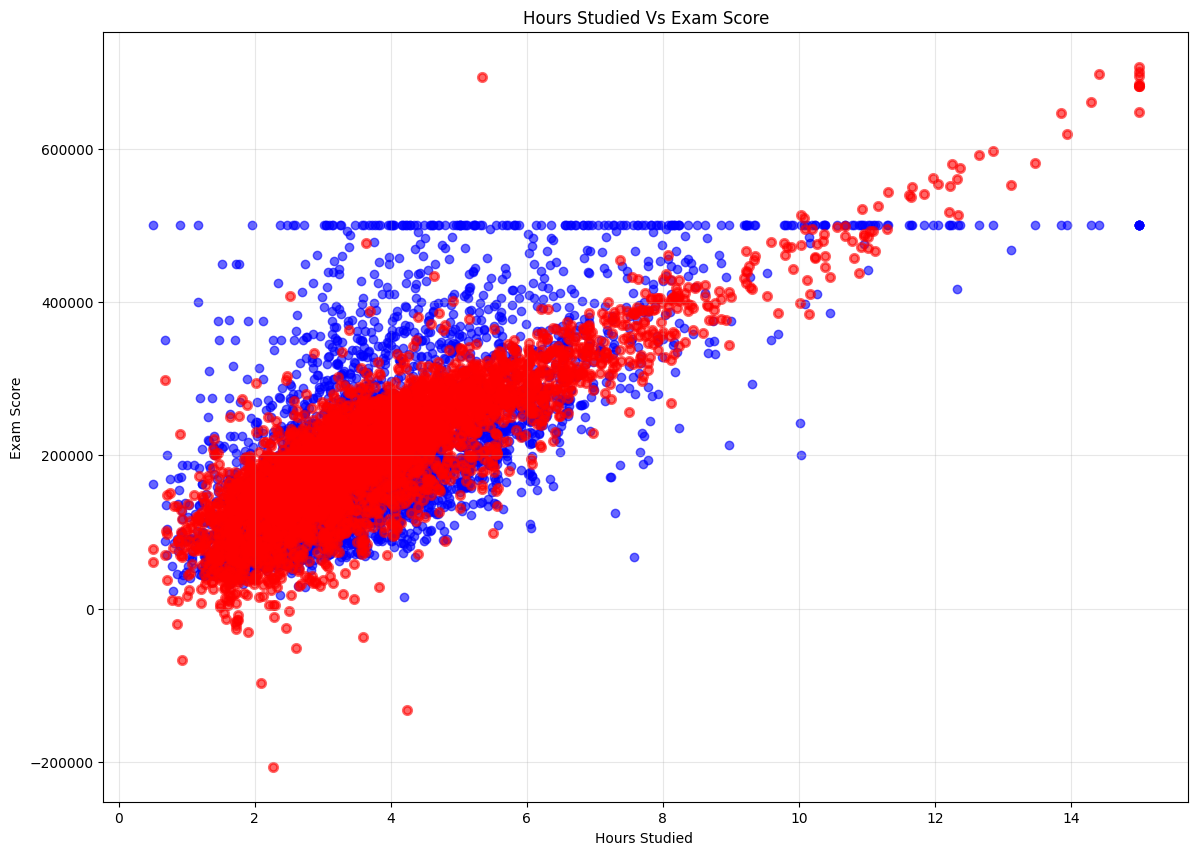

In [101]:
plt.figure(figsize= (14 ,10))
plt.scatter(X_test['median_income'] ,y_test , label = "Acutal Data",color = 'blue', alpha = 0.6)
plt.scatter(X_test['median_income'] ,y_pred_reg ,label = 'Regression Line' ,color = 'red',linewidths= 2, alpha = 0.6)
plt.title("Hours Studied Vs Exam Score")
plt.xlabel("Hours Studied ")
plt.ylabel("Exam Score")
plt.grid(True ,alpha = 0.3)
plt.show()

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)


xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))


MAE: 30021.53515625
MSE: 2118220416.0
R2: 0.838354229927063


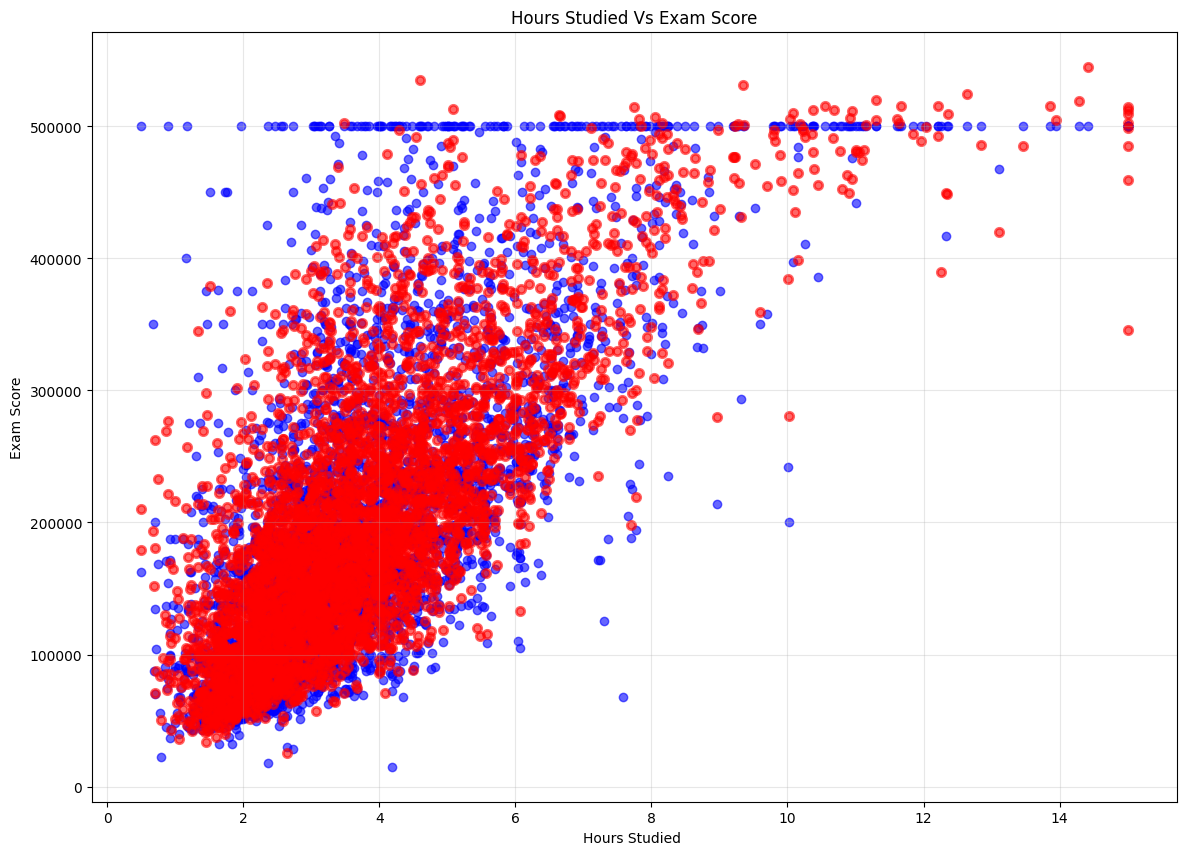

In [103]:
plt.figure(figsize= (14 ,10))
plt.scatter(X_test['median_income'] ,y_test , label = "Acutal Data",color = 'blue', alpha = 0.6)
plt.scatter(X_test['median_income'] ,y_pred_xgb ,label = 'Regression Line' ,color = 'red',linewidths= 2, alpha = 0.6)
plt.title("Hours Studied Vs Exam Score")
plt.xlabel("Hours Studied ")
plt.ylabel("Exam Score")
plt.grid(True ,alpha = 0.3)
plt.show()